 Stationarity Test for Original Data:

Performing Stationarity Tests...

ADF Test:
Test Statistic: -2.256990350047235
p-value: 0.1862146911658712

KPSS Test:
Test Statistic: 3.5315970094994853
p-value: 0.01


 Stationarity Test after Differencing:

Performing Stationarity Tests...

ADF Test:
Test Statistic: -7.104890882267311
p-value: 4.0777865655394095e-10

KPSS Test:
Test Statistic: 0.14518934657460816
p-value: 0.1


 Stationarity Test after Log Differencing:

Performing Stationarity Tests...

ADF Test:
Test Statistic: -6.733445141861886
p-value: 3.2520443627353356e-09

KPSS Test:
Test Statistic: 0.10652709374552315
p-value: 0.1



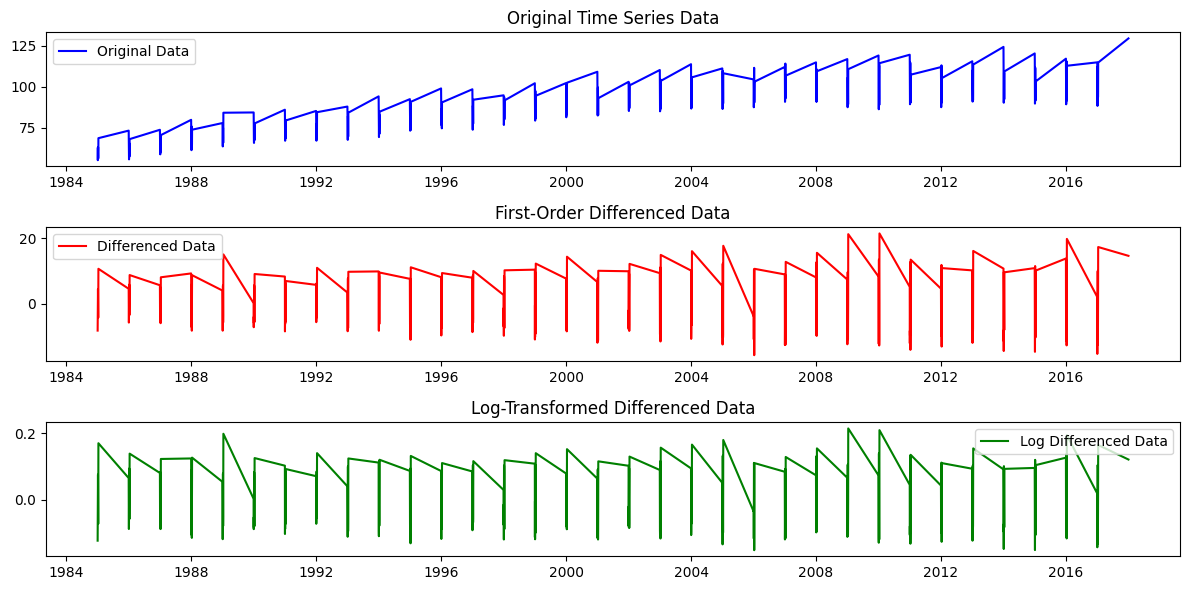

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from statsmodels.tsa.stattools import adfuller, kpss

# Ignore warnings to prevent InterpolationWarning
warnings.filterwarnings("ignore")

# Load the dataset
file_path = "Electric_Production.csv"  # Update path if needed
df = pd.read_csv(file_path)

# Convert DATE column to datetime and set as index
df['DATE'] = pd.to_datetime(df['DATE'], format='%d-%m-%Y')
df.set_index('DATE', inplace=True)

# Ensure there are no missing values
df.dropna(inplace=True)

# Function to perform stationarity tests
def stationarity_tests(series):
    print("\nPerforming Stationarity Tests...\n")

    # ADF Test (Augmented Dickey-Fuller)
    adf_test = adfuller(series, autolag='AIC')
    print(f"ADF Test:\nTest Statistic: {adf_test[0]}\np-value: {adf_test[1]}\n")

    # KPSS Test (Kwiatkowski-Phillips-Schmidt-Shin)
    try:
        kpss_test = kpss(series, regression='c', nlags='auto')  # Used 'auto' to avoid warnings
        print(f"KPSS Test:\nTest Statistic: {kpss_test[0]}\np-value: {kpss_test[1]}\n")
    except ValueError as e:
        print(f"KPSS Test could not be performed: {e}\n")
    except Exception as e:
        print(f"An unexpected error occurred during the KPSS test: {e}\n")

#  **Stationarity Test for Original Data**
print(" Stationarity Test for Original Data:")
stationarity_tests(df['Value'])

#  **First Differencing to Remove Trend**
df['Value_Diff'] = df['Value'].diff()
df.dropna(inplace=True)  # Drop NA after differencing

print("\n Stationarity Test after Differencing:")
stationarity_tests(df['Value_Diff'])

# **Log Differencing (Log Transform + Differencing)**
df['Log_Value'] = np.log(df['Value'])
df['Log_Value_Diff'] = df['Log_Value'].diff()
df.dropna(inplace=True)  # Drop NA after log differencing

print("\n Stationarity Test after Log Differencing:")
stationarity_tests(df['Log_Value_Diff'])

# 📊 **Plotting Original, Differenced, and Log-Differenced Data**
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(df['Value'], label="Original Data", color='blue')
plt.title("Original Time Series Data")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(df['Value_Diff'], label="Differenced Data", color='red')
plt.title("First-Order Differenced Data")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(df['Log_Value_Diff'], label="Log Differenced Data", color='green')
plt.title("Log-Transformed Differenced Data")
plt.legend()

plt.tight_layout()
plt.show()

